In [1]:
import sys
sys.path.append("../src/")
from auv_gym_env import Environment
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# instantiate environment
world_size = 50
gravity = -1
xinit, yinit = 10, 10
targetx, targety = 0, 0
env = Environment(world_size, gravity, xinit, yinit, targetx, targety)
env.render()

In [3]:
# control AUV with constant thrust angle and power
nframes = 2000
rewards = list()
for frame in range(nframes):
    env.render()
    obs, reward, done, info = env.step((
        np.random.uniform(*env.auv._thruster_angle_limits), 
        np.random.uniform(0, env.auv._thruster_limit)
    ))
    rewards.append(reward)

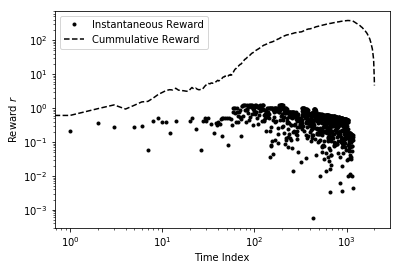

In [4]:
# plot instantaneous reward sequence
plt.figure()
plt.plot(rewards, "k.")
plt.plot(np.cumsum(rewards), "k--")
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Reward $r$')
plt.xlabel('Time Index')
plt.legend(['Instantaneous Reward', 'Cummulative Reward'])
plt.show()